In [1]:
# Replicate the terminal digit analysis from the review project paper
# Erik P Bertelli
# UC Berkeley
# Stats 215A
# September 18 2016

'''
This code replicates the Terminal Digits Analysis found the referee project paper for Stats 215A Fall 2016 at UC Berkeley
In order to run it you must have the 7 files in a subfolder datasets/ of your working directory
Set the filename parameter to the file of interest and run
Results will be output to a file called Terminal Digit Outputs.csv
'''

In [155]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chisquare
from IPython.display import display, HTML

""" Here are all of the possible files you can load into this script

COLONY COUNTS
"datasets/Bishayee Colony Counts 10.27.97-3.8.01.xlsx" 
"datasets/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx"
"datasets/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx"

COULTER COUNTS
"datasets/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx"
"datasets/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx"
"datasets/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx"
"datasets/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx"
"""

# set filename here
filename = "datasets/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx"

# there are differences in the files in number of rows to skip
if filename == "datasets/Bishayee Colony Counts 10.27.97-3.8.01.xlsx":
    rows_to_skip = [0,1]
elif filename == "datasets/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx":
    rows_to_skip = []
else:
    rows_to_skip = [0]

# there are different column names in the files we must account for
if filename == "datasets/Bishayee Colony Counts 10.27.97-3.8.01.xlsx":
    column_names = ['col1', 'col2', 'col3']
elif filename == "datasets/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx":
    column_names = ['col1', 'col2', 'col3']
elif filename == "datasets/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx":
    column_names = ['c1', 'c2', 'c3']
elif filename == "datasets/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx":
    column_names = ['Count 1','Count 2','Count 3']
elif filename == "datasets/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx":
    column_names = ['Coul 1','Coul 2','Coul 3']
elif filename == "datasets/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx":
    column_names = ['Unnamed: 1','Unnamed: 2','Unnamed: 3']
else:
    column_names = ['Count 1','Count 2','Count 3']   

# read in the file 
df = pd.read_excel(filename, skiprows = rows_to_skip)
df.as_matrix()

# get only the three columns
df_triples = df[column_names].apply(pd.to_numeric,errors='coerce')

In [156]:
def terminal_digit(a):
    return a % 10 

df_terminal = df_triples.apply(terminal_digit)
df_terminal_vector = np.concatenate((df_terminal[column_names[0]],df_terminal[column_names[1]],df_terminal[column_names[2]]))

df_terminal_vector = df_terminal_vector[np.logical_not(np.isnan(df_terminal_vector))]

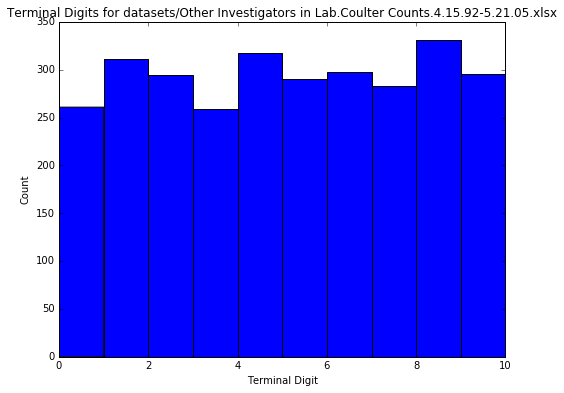

In [157]:
plt.figure(figsize=(8, 6))
plt.hist(df_terminal_vector, bins=np.arange(11))
plt.title('Terminal Digits for %s' %filename)
plt.xlabel('Terminal Digit')
plt.ylabel('Count')

In [158]:
hist = np.histogram(df_terminal_vector, bins=np.arange(11))

hist_out = np.row_stack((hist[1][0:10], hist[0]))

print(hist_out)

chi_out = chisquare(hist[0])

print(chi_out)

[[  0   1   2   3   4   5   6   7   8   9]
 [261 311 295 259 318 290 298 283 331 296]]
Power_divergenceResult(statistic=15.994561522773623, pvalue=0.066995244285223132)


[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
  72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
  96 97 98 99]
 [18 25 28 30 40 41 15 23 31 38 34 30 28 25 30 34 28 25 25 28 29 39 34 22
  30 24 38 32 37 30 19 30 36 21 30 23 34 19 29 29 21 29 23 30 28 24 23 31
  26 25 44 26 31 26 27 29 28 24 36 31 25 34 33 21 32 36 31 37 33 29 30 40
  28 23 24 16 33 30 36 31 20 26 24 25 41 26 26 24 39 23 19 27 24 34 28 27
  38 29 36 26]]
Power_divergenceResult(statistic=121.69414617249738, pvalue=0.060527331349306712)


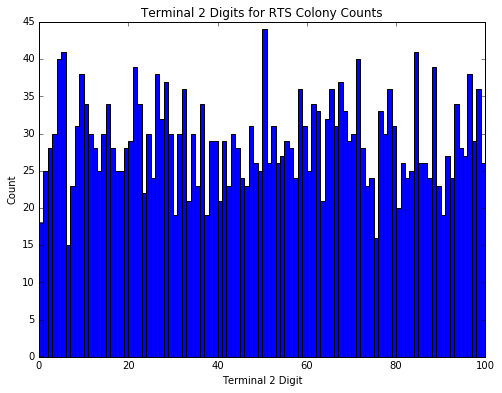

In [159]:
def terminal2_digit(a):
    return a % 100

df_vector = np.concatenate((df_triples[column_names[0]],df_triples[column_names[1]],df_triples[column_names[2]]))

# only consider three digit numbers for this part
df_vector = df_vector[df_vector > 99]

df_terminal2_vector =  np.apply_along_axis(terminal2_digit, 0, df_vector) 

df_terminal2_vector = df_terminal2_vector[np.logical_not(np.isnan(df_terminal2_vector))]

plt.figure(figsize=(8, 6))
plt.hist(df_terminal2_vector, bins=np.arange(101))
plt.title('Terminal 2 Digits for RTS Colony Counts')
plt.xlabel('Terminal 2 Digit')
plt.ylabel('Count')

hist2 = np.histogram(df_terminal2_vector, bins=np.arange(101))

hist2_out = np.row_stack((hist2[1][0:100], hist2[0]))

print(hist2_out)

chi2_out = chisquare(hist2[0])

print(chi2_out)

In [151]:
equal_digits = sum(hist2[0][[0,11,22,33,44,55,66,77,88,99]])
print(equal_digits)

30


In [152]:
from scipy.stats import binom

n = len(df_terminal2_vector)

equal_digitprob = 1 - binom.cdf(equal_digits, len(df_terminal2_vector), .1)
print(equal_digitprob)

0.832819915808


In [153]:
import csv
with open('Terminal Digit Outputs.csv', 'a', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow([filename])
    a.writerows(hist_out)
    a.writerow(['statistic','pvalue'])
    a.writerow(chi_out)
    a.writerows(hist2_out)
    a.writerow(['statistic','pvalue'])
    a.writerow(chi2_out)
    a.writerow(['Number of Equal Digits','Total','prob'])
    a.writerow([equal_digits, n, equal_digitprob])

    
    